# Capstone Project

## Segmenting and Clustering Affordable Housing Projects in San Francisco

## Table of contents

    
1 - [Introduction: Business Problem](#introduction)  
  
  
2 - [Data](#data)  
    2.1 - [Source of Data](#source)  
    2.2 - [Download and Explore Dataset](#explore)  
  
  
3 - [Methodology](#methodology)
  
  
4 - [Analysis](#analysis)  
    4.1 - [Analyze Each Project](#analyze)  
    4.2 - [Cluster Projects](#cluster)  
    4.3 - [Examine Clusters](#examine)  
  
  
5 - [Results and Discussion](#results)
  
  
6 - [Conclusion](#conclusion)



## 1. Introduction <a name="introduction"></a>  
  
### Business Problem

Lots of people in San Francisco still can not afford their own houses. Hundreds of affordable housing pipeline projects were published by Mayor’s Office of Housing and Community Development (MOHCD) and the Office of Community Investment and Infrastructure (OCII). The projects listed are in the process of development--or are anticipated to be developed--in partnership with non-profit or for-profit developers and financed through city funding agreements, ground leases, disposition and participation agreements and conduit bond financing. The Affordable Housing Pipeline also includes housing units produced by private developers through the Inclusionary Affordable Housing Program. 

In this project, I will try to find a category of optimal affordable housing projects with better living facilities. This report will be targeted to individuals who want to have their own home but can not afford commodity housing in San Francisco. 

Since there are over hundreds of proiects in San Francisco, which one will be the right one. It is widely believed that a mature residential areas should be equipped with a range of living facilities, such as restaurants/gyms/markets/hospitals etc... So I am going to leverage the Foursquare location data to compare each project to provide reliable suggestions for individuals who need a place to live.

Data science powers we learnt these several weeks will be used to generate a few most promissing projects based on this criteria. I will cluster all the affordable housing programs into several catergories, advantages of each category will then be clearly expressed to help individuals make their first-step decisions.

## 2. Data <a name="data"></a>  

### 2.1  Source of Data <a name="source"></a>  

Based on the business problem, factors that will influence individuals to make the first-step decission are:
* Number of existing facilities around each project
* Type of existing facilities around each project

Following data sources will be needed to generate the proper decission:
* Basic information(project name/location/housing tenure ) of all the affordable housing programs, which can be get from **open data website of San Francisco GOV (https://data.sfgov.org/)**
* Number of existing facilities and their type and location in every neighborhood will be obtained using **Foursquare API**

### 2.2  Download and Explore Dataset <a name="explore"></a>  

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')


Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00   4.20 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00   4.50 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00   7.18 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  29.36 MB/s
vincent-0.4.4- 100% |###################

In [2]:
df_metadata = pd.read_csv('https://data.sfgov.org/resource/e2px-wugd.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [3]:
df_metadata.head()

,:@computed_region_26cr_cadq,:@computed_region_6ezc_tdp2,:@computed_region_6qbp_sg9q,:@computed_region_ajp5_b2md,:@computed_region_bh8s_q3mv,:@computed_region_f58d_8dbm,:@computed_region_h4ep_8xdi,:@computed_region_jx4q_fizf,:@computed_region_qgnn_b9vv,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,_100_ami,_120_ami,_150_ami,_1bd_units,_20_ami,_2bd_units,_30_ami,_3bd_units,_4bd_units,_50_ami,_55_ami,_5_bd_units,_60_ami,_80_ami,_90_ami,affordable,affordable_units,city_analysis_neighborhood,dbi_permit_number,disabled_units,entitlement_approval,estimated_actual_construction_start_date,estimated_construction_completion,family_units,homeless_units,housing_tenure,issuance_of_building_permit,issuance_of_first_construction_document,issuance_of_notice_to_proceed,latitude,lead_agency,location,location_address,location_city,location_state,location_zip,longitude,losp_units,manager_unit_s_type,manager_units,market_rate_units,mobility_units,planning_address,planning_case_number,planning_entitlements,planning_neighborhood,program_area,project_area,project_co_sponsor,project_id,project_lead_sponsor,project_name,project_owner,project_status,project_type,project_units,property_informaiton_map_link,property_informaiton_map_link_description,public_housing_replacement_units,recording_date,recording_number,section_415_declaration,senior_units,sro_units,street_name,street_number,street_type,studio_units,supervisor_district,tay_units,zip_code
0,9,NaN,53,20,28859,19,NaN,7,3,8,2.0,0,0,0,6,0,5,0,0,0,0,11,0,0,0,0,18.0,11,Mission,NaN,0.0,2018-08-23T00:00:00.000,2023-08-22T00:00:00.000,2025-08-21T00:00:00.000,0,0,Rental,NaN,NaN,NaN,37.760800,MOHCD,POINT (-122.409716033999 37.760799555),NaN,NaN,NaN,NaN,-122.409716,0,NaN,0,0,0,2750 19TH ST 94110,2014-001400ENX,,Mission,Inclusionary,0,NaN,2018-016,"Reuben, Junius & Rose, LLP",2750 19th St,NaN,(3) Design with Entitlements Approved,New Construction,60,http://propertymap.sfplanning.org/?search=2014...,NaN,0,NaN,NaN,On-site BMR Project,0,0,19th,2750,St,0,10,0,94110
1,10,NaN,34,4,310,20,NaN,3,1,9,14.0,0,0,0,0,0,0,0,0,0,140,0,0,0,0,0,99.0,140,Mission Bay,NaN,0.0,NaN,2018-05-01T00:00:00.000,2019-12-15T00:00:00.000,0,140,Rental,NaN,NaN,2018-05-01T00:00:00.000,37.772541,OCII,POINT (-122.388323222999 37.77254133),NaN,NaN,NaN,NaN,-122.388323,140,1bd,1,1,0,Not Applicable,Not Applicable,NaN,South of Market,Multifamily,Mission Bay,NaN,2016-085,Developer not yet selected,Mission Bay South Block 9,Developer not yet selected,(1) Preliminary Phase,New Construction,141,NaN,NaN,0,NaN,NaN,NaN,0,0,China Basin,410,St,140,6,0,94158
2,2,NaN,53,20,28859,19,NaN,7,3,7,2.0,0,0,0,30,0,41,0,14,0,72,0,0,42,0,0,99.0,129,Mission,NaN,0.0,NaN,2019-05-01T00:00:00.000,2020-07-01T00:00:00.000,89,40,Rental,NaN,NaN,2019-05-01T00:00:00.000,37.761041,MOHCD,POINT (-122.410547142999 37.761040613),NaN,NaN,NaN,NaN,-122.410547,40,1bd,1,1,0,Planning address not yet assigned,Not Yet Available,NaN,Mission,Multifamily,0,Mission Economic Development Agency,2016-080,Tenderloin Neighborhood Development Corporation,681 Florida (2070 Bryant),681 Florida L.P.,(2) Predevelopment Feasibility,New Construction,130,NaN,NaN,0,NaN,NaN,NaN,0,0,Florida,681,St,44,9,0,94110
3,11,NaN,97,39,28852,41,NaN,6,4,11,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,Hayes Valley,NaN,0.0,2018-08-30T00:00:00.000,2023-08-29T00:00:00.000,2025-08-28T00:00:00.000,0,0,Unknown,NaN,NaN,NaN,37.780042,MOHCD,POINT (-122.425004534999 37.780042178),NaN,NaN,NaN,NaN,-122.425005,0,NaN,0,0,0,807 FRANKLIN ST 94102,2017-007542PRJ,"2017-007542CUA,2017-007542ENV,2017-007542PPA,2...",Downtown/Civic Center,Inclusionary,0,NaN,2018-018,802 Franklin LLC,635 Fulton St,NaN,(3) Design with Entitlements Approved,New Construction,17,http://propertymap.sfplanning.org/?search=2017...,NaN,0,NaN,NaN,Fee Payment,0,0,Fulton,635,St,0,10,0,94102
4,10,NaN,32,34,28853,34,NaN,2,1,9,8.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,10.0,2,South of Market,NaN,0.0,2018-07-26T00:00:00.000,2023-07-25T00:00:00.000,2025-07-24T00:00:00.000,0,0,Ownershi

In [4]:
col_names = df_metadata.columns
print(col_names)

Index([':@computed_region_26cr_cadq', ':@computed_region_6ezc_tdp2',
       ':@computed_region_6qbp_sg9q', ':@computed_region_ajp5_b2md',
       ':@computed_region_bh8s_q3mv', ':@computed_region_f58d_8dbm',
       ':@computed_region_h4ep_8xdi', ':@computed_region_jx4q_fizf',
       ':@computed_region_qgnn_b9vv', ':@computed_region_rxqg_mtj9',
       ':@computed_region_yftq_j783', '_100_ami', '_120_ami', '_150_ami',
       '_1bd_units', '_20_ami', '_2bd_units', '_30_ami', '_3bd_units',
       '_4bd_units', '_50_ami', '_55_ami', '_5_bd_units', '_60_ami', '_80_ami',
       '_90_ami', 'affordable', 'affordable_units',
       'city_analysis_neighborhood', 'dbi_permit_number', 'disabled_units',
       'entitlement_approval', 'estimated_actual_construction_start_date',
       'estimated_construction_completion', 'family_units', 'homeless_units',
       'housing_tenure', 'issuance_of_building_permit',
       'issuance_of_first_construction_document',
       'issuance_of_notice_to_proceed', 'la

In [5]:
df_metadata.shape

(329, 82)

In [6]:
df_housing=df_metadata[['project_name','street_name','planning_address','planning_neighborhood','housing_tenure','longitude','latitude']]
df_housing.head(20)

,project_name,street_name,planning_address,planning_neighborhood,housing_tenure,longitude,latitude
0,2750 19th St,19th,2750 19TH ST 94110,Mission,Rental,-122.409716,37.760800
1,Mission Bay South Block 9,China Basin,Not Applicable,South of Market,Rental,-122.388323,37.772541
2,681 Florida (2070 Bryant),Florida,Planning address not yet assigned,Mission,Rental,-122.410547,37.761041
3,635 Fulton St,Fulton,807 FRANKLIN ST 94102,Downtown/Civic Center,Unknown,-122.425005,37.780042
4,280 7th St,7th,280 07TH ST 94103,South of Market,Ownership,-122.408473,37.776827
5,Natalie Gubb Commons (Transbay Block 7 ),Beale,Not Applicable,Financial District,Rental,-122.393822,37.788893
6,3620 Cesar Chavez,Cesar Chavez,2176 Market St,Mission,Unknown,-122.421911,37.748323
7,"HPSY, Block 1 (Hilltop)",Address not yet assigned,Not Applicable,Bayview,Ownership,-122.370225,37.729497
8,603 Tennessee,Tennessee,603 TENNESSEE ST 94107,Potrero Hill,Unknown,-122.389516,37.764005
9,Eastern Park Apartments,Eddy,Planning address not yet assigned,Downtown/Civic Center,Rental,-122.419565,37.782768


In [7]:
df_data=df_housing[df_housing.housing_tenure=='Ownership'].reset_index(drop=True)
df_data.head(10)

,project_name,street_name,planning_address,planning_neighborhood,housing_tenure,longitude,latitude
0,280 7th St,7th,280 07TH ST 94103,South of Market,Ownership,-122.408473,37.776827
1,"HPSY, Block 1 (Hilltop)",Address not yet assigned,Not Applicable,Bayview,Ownership,-122.370225,37.729497
2,"Block 48, Phase 2A, Block F",La Salle,Not Applicable,Bayview,Ownership,-122.377280,37.728275
3,"Block 48, Phase 2A, Block J",La Salle,Not Applicable,Bayview,Ownership,-122.376507,37.728128
4,25-35 Dolores,Dolores,2177 Market St,Mission,Ownership,-122.426308,37.768560
5,"Block 48, Phase 3A, Block K",Oakdale,Not Applicable,Bayview,Ownership,-122.375506,37.727509
6,"Block 48, Phase 3B, Block D",Oakdale,Not Applicable,Bayview,Ownership,-122.377611,37.727728
7,"HPSY, Block 56/57",Innes,Not Applicable,Bayview,Ownership,-122.367609,37.727610
8,198 Valencia,Valencia,"198 VALENCIA ST, SAN FRANCISCO, CA",Mission,Ownership,-122.422686,37.770096
9,CP-02,Address not yet assigned,Not Applicable,Bayview,Ownership,-122.386183,37.713525


In [8]:
df_data.shape

(75, 7)

In [9]:
# create map of SanFran using latitude and longitude values
map_sf = folium.Map(location=[37.77, -122.42], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_data['latitude'], df_data['longitude'], df_data['project_name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)

# add pop-up text to each marker on the map
latitudes = list(df_data['latitude'])
longitudes = list(df_data['longitude'])
labels = list(df_data['project_name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_sf) 
    
map_sf

## 3. Methodology <a name="methodology"></a>

In this project, I am going to explore a category of optimal affordable housing projects in San Francisco with better living facilities (such as restaurants/gyms/markets/hospitals etc..), to help individuals make the first-step decision.  

1) The first step should be define the business problem, we already have done that in **Introduction**  

2) The second step should be download the data and explore it, as we have done in **Data**.  
    My raw data almost has all the information I need for the analysis, such as **'project_name /street_name /planning_address /planning_neighborhood /housing_tenure /longitude /latitude'**, especially the location information, which indeed do me a great favour.  
    In this step, I pre-processed the data, as the suggestion is for individuals who want to buy a house, so **'housing_tenure' should be 'Ownership'**.  
    Also, a **map** of SanFran with markers was created using latitude and longitude values of the affordable housing projects.

3) The Third step is explore neighborhoods of each affordable housing projects in San Francisco.  
    Obtain **number of existing facilities and their type and location** in every affordable housing project with **Foursquare API**.  
    
4)  The final step, cluster the all the affordable housing projects with K-means.  
    A ccording to all the venue data from step 4, I will focus on using **unsupervised learning K-means algorithm** to cluster the all the affordable housing projects, and analysis the dvantages of each category to help individuals make their first-step decisions.  
    I will also **visualize geographic details** of each cluster, which should be a starting point for individuals to explore and search for optimal affordable housing projects.

## 4. Analysis <a name="analysis"></a>

### 4.1  Analyze Each Project <a name="analyze"></a>

Explore Neighborhoods around each project in San Francisco 

In [10]:
# Define Foursquare Credentials and Version
CLIENT_ID = '4WLKCPPN3BRDEJG1JE4JJA3D3EGZBTUISSDKJKHHWLVZNMBL' # your Foursquare ID
CLIENT_SECRET = '2K1CSDXIM5GFIR5ZEIAMRBE1U5VOUC4VKI4TT0UDFFMAWXF4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4WLKCPPN3BRDEJG1JE4JJA3D3EGZBTUISSDKJKHHWLVZNMBL
CLIENT_SECRET:2K1CSDXIM5GFIR5ZEIAMRBE1U5VOUC4VKI4TT0UDFFMAWXF4


In [11]:
# Explore Neighborhoods in San Francisco
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['project_name', 
                  'project_name Latitude', 
                  'project_name Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
import requests # library to handle requests
SF_venues = getNearbyVenues(names=df_data['project_name'],
                                   latitudes=df_data['latitude'],
                                   longitudes=df_data['longitude']
                                  )

280 7th St
HPSY, Block 1 (Hilltop)
Block 48, Phase 2A, Block F
Block 48, Phase 2A, Block J
25-35 Dolores 
Block 48, Phase 3A, Block K
Block 48, Phase 3B, Block D
HPSY, Block 56/57
198 Valencia
CP-02
Stage 1075
Transbay Block 1 (Inclusionary)
Transbay Block 1 (Affordable Project)
Block 48, Phase 2A, Block M
Block 48, Phase 2B, Block L
Block 48, Phase 1B, Block A
2444 Lombard
HPSY, Block 52 (Inclusionary)
Parcel B (HP02/HP03)
Block 48, Phase 2A, Block B
CP-03, CP-04
Block 48, Phase 3B, Block Q
Block 48, Phase 1B, Block G
HPSY, Block 55 (Inclusionary)
600 20th
Block 48, Phase 3A, Block H
555 Golden Gate
2525 Van Ness
Block 48, Phase 2B, Block I
Block 48, Phase 2B, Block E
Fulton 555
1700 Market 
1463 Lombard
1726-1730 Mission
651 Geary 
2800 Sloat Boulevard
Block 48, Phase 1A, Block P
Block 48, Phase 1A, Block N1
3601 Lawton
1150 16th  (AKA 1208 8th)
349 8th
1198 Valencia
555 Howard
342-360 5th
2435-2445 16th 
469 Eddy
1228 Folsom
1000 Mississippi 
719 Larkin
495 Cambridge
180 Jones  / 18

In [13]:
print(SF_venues.shape)
SF_venues.head()

(4141, 7)


,project_name,project_name Latitude,project_name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,280 7th St,37.776827,-122.408473,Sightglass Coffee,37.777001,-122.408519,Coffee Shop
1,280 7th St,37.776827,-122.408473,Cellarmaker Brewing Company,37.777116,-122.410714,Brewery
2,280 7th St,37.776827,-122.408473,Deli Board,37.777621,-122.407095,Sandwich Place
3,280 7th St,37.776827,-122.408473,Vive La Tarte,37.777012,-122.410899,Café
4,280 7th St,37.776827,-122.408473,Terroir,37.776524,-122.408413,Wine Bar


In [14]:
# check how many venues were returned for each project
SF_venues.groupby('project_name').count()

,project_name Latitude,project_name Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
project_name,,,,,,
1000 Mississippi,17,17,17,17,17,17
1150 16th (AKA 1208 8th),56,56,56,56,56,56
1198 Valencia,100,100,100,100,100,100
1228 Folsom,100,100,100,100,100,100
1238 Sutter,100,100,100,100,100,100
1433 Bush,100,100,100,100,100,100
1463 Lombard,64,64,64,64,64,64
1527-1545 Pine (The Austin),100,100,100,100,100,100
1546-1564 Market & 55 Oak,100,100,100,100,100,100


In [15]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 300 uniques categories.


### Part 3. Analyze Each Project

In [16]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['project_name'] = SF_venues['project_name'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,project_name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Laboratory,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Pa

In [17]:
print(SF_onehot.shape)
SF_onehot.columns.values

(4141, 301)


array(['project_name', 'ATM', 'Accessories Store', 'Adult Boutique',
       'Afghan Restaurant', 'African Restaurant', 'American Restaurant',
       'Antique Shop', 'Arcade', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'Austrian Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bank',
       'Bar', 'Baseball Field', 'Basketball Court', 'Bath House', 'Beach',
       'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Beer Store',
       'Bike Shop', 'Bistro', 'Board Shop', 'Boat or Ferry', 'Bookstore',
       'Boutique', 'Boxing Gym', 'Brazilian Restaurant', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Building', 'Burger Joint',
       'Burmese Restaurant', 'Burrito Place', 'Bus Line', 'Bus Station',
       'Bus Stop', 'Butcher', 'Cable Car', 'Café',
       'Cajun / Creole Restaurant', 'Camera Store', 'Campground',
       'Candy Store', 'Cheese Shop', 'Chinese Rest

In [18]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
SF_grouped = SF_onehot.groupby('project_name').mean().reset_index()
SF_grouped

,project_name,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Factory,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Laboratory,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Pa

In [19]:
# print each project along with the top 5 most common venues
num_top_venues = 5

for hood in SF_grouped['project_name']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['project_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1000 Mississippi ----
           venue  freq
0           Park  0.18
1    Coffee Shop  0.12
2  Deli / Bodega  0.12
3      Nightclub  0.06
4       Creperie  0.06


----1150 16th  (AKA 1208 8th)----
                    venue  freq
0  Furniture / Home Store  0.07
1             Art Gallery  0.05
2               Wine Shop  0.05
3      Mexican Restaurant  0.04
4                 Brewery  0.04


----1198 Valencia----
                venue  freq
0  Mexican Restaurant  0.06
1   Indian Restaurant  0.04
2                 Bar  0.04
3      Clothing Store  0.04
4         Art Gallery  0.03


----1228 Folsom----
          venue  freq
0     Nightclub  0.06
1  Cocktail Bar  0.06
2   Coffee Shop  0.06
3       Gay Bar  0.05
4          Café  0.04


----1238 Sutter  ----
                   venue  freq
0  Vietnamese Restaurant  0.06
1        Thai Restaurant  0.05
2                    Bar  0.05
3       Sushi Restaurant  0.03
4              Wine Shop  0.03


----1433 Bush ----
                   venue  freq


In [20]:
# Put that into a pandas dataframe

# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['project_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
project_venues_sorted = pd.DataFrame(columns=columns)
project_venues_sorted['project_name'] = SF_grouped['project_name']

for ind in np.arange(SF_grouped.shape[0]):
    project_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

project_venues_sorted.head()

,project_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1000 Mississippi,Park,Deli / Bodega,Coffee Shop,Art Gallery,Playground,Creperie,Electronics Store,Church,Nightclub,Gym / Fitness Center
1,1150 16th (AKA 1208 8th),Furniture / Home Store,Wine Shop,Art Gallery,Mexican Restaurant,Coffee Shop,American Restaurant,Brewery,Gym,Motorcycle Shop,Tanning Salon
2,1198 Valencia,Mexican Restaurant,Indian Restaurant,Clothing Store,Bar,New American Restaurant,Italian Restaurant,Bakery,Latin American Restaurant,Boutique,Café
3,1228 Folsom,Coffee Shop,Nightclub,Cocktail Bar,Gay Bar,Art Gallery,Café,Motorcycle Shop,Furniture / Home Store,Wine Bar,Food Truck
4,1238 Sutter,Vietnamese Restaurant,Thai Restaurant,Bar,Coffee Shop,Sushi Restaurant,Gym,Cocktail Bar,Grocery Store,Wine Shop,Sandwich Place


### 4.2  Cluster Projects <a name="cluster"></a>

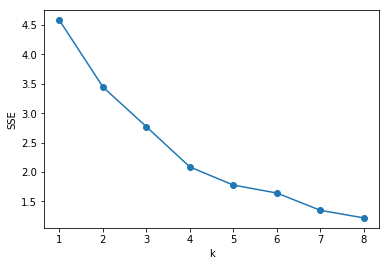

In [21]:
# Find the best K with Elbow criterion
SF_grouped_clustering = SF_grouped.drop('project_name', 1)
'利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(SF_grouped_clustering)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

Obviously, we can see that **K=4 is right at the elbow**, so we are going to have 4 clusters

In [22]:
# Run k-means to cluster the projects into 4 clusters

# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
# Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels

project_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SF_merged = df_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(project_venues_sorted.set_index('project_name'), on='project_name')

SF_merged.head() # check the last columns!

,project_name,street_name,planning_address,planning_neighborhood,housing_tenure,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,280 7th St,7th,280 07TH ST 94103,South of Market,Ownership,-122.408473,37.776827,1,Café,Coffee Shop,Art Gallery,Sandwich Place,Cocktail Bar,Vietnamese Restaurant,Nightclub,Motorcycle Shop,Bar,Dance Studio
1,"HPSY, Block 1 (Hilltop)",Address not yet assigned,Not Applicable,Bayview,Ownership,-122.370225,37.729497,3,Art Gallery,Bus Stop,Grocery Store,Outdoor Sculpture,Restaurant,Harbor / Marina,Spa,Food & Drink Shop,Food,Food Court
2,"Block 48, Phase 2A, Block F",La Salle,Not Applicable,Bayview,Ownership,-122.377280,37.728275,0,Art Gallery,Spa,Motorcycle Shop,Bus Station,Public Art,Seafood Restaurant,Jewelry Store,Lighting Store,Flower Shop,Fast Food Restaurant
3,"Block 48, Phase 2A, Block J",La Salle,Not Applicable,Bayview,Ownership,-122.376507,37.728128,0,Art Gallery,Spa,Motorcycle Shop,Bus Station,Public Art,Seafood Restaurant,Jewelry Store,Lighting Store,Flower Shop,Fast Food Restaurant
4,25-35 Dolores,Dolores,2177 Market St,Mission,Ownership,-122.426308,37.768560,1,Boutique,Gym / Fitness Center,Cocktail Bar,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Furniture / Home Store,Pizza Place,Pet Store,New American Restaurant


In [24]:
# Visualize the resulting clusters

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# create map
map_clusters = folium.Map(location=[37.77, -122.42], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['latitude'], SF_merged['longitude'], SF_merged['planning_neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.3  Examine Clusters <a name="examine"></a>

In [26]:
# Examine each cluster and determine the discriminating venue categories that distinguish each cluster

#Cluster 1
SF_Cluster1=SF_merged.loc[SF_merged['Cluster Labels'] == 0, SF_merged.columns[[1] + list(range(5, SF_merged.shape[1]))]]
SF_Cluster1.shape

(12, 14)

In [27]:
SF_Cluster1.head(12)

,street_name,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,La Salle,-122.377280,37.728275,0,Art Gallery,Spa,Motorcycle Shop,Bus Station,Public Art,Seafood Restaurant,Jewelry Store,Lighting Store,Flower Shop,Fast Food Restaurant
3,La Salle,-122.376507,37.728128,0,Art Gallery,Spa,Motorcycle Shop,Bus Station,Public Art,Seafood Restaurant,Jewelry Store,Lighting Store,Flower Shop,Fast Food Restaurant
5,Oakdale,-122.375506,37.727509,0,Art Gallery,Spa,Motorcycle Shop,Bakery,Public Art,Bus Station,Jewelry Store,Fondue Restaurant,Filipino Restaurant,Financial or Legal Service
13,La Salle,-122.375723,37.728081,0,Art Gallery,Spa,Motorcycle Shop,Bakery,Public Art,Bus Station,Jewelry Store,Fondue Restaurant,Filipino Restaurant,Financial or Legal Service
14,Oakdale,-122.375756,37.727854,0,Art Gallery,Spa,Motorcycle Shop,Bakery,Public Art,Bus Station,Jewelry Store,Fondue Restaurant,Filipino Restaurant,Financial or Legal Service
22,La Salle,-122.377179,37.728694,0,Art Gallery,Spa,Motorcycle Shop,Bus Station,Public Art,Seafood Restaurant,Jewelry Store,Lighting Store,Flower Shop,Fast Food Restaurant
25,Oakdale,-122.376622,37.727531,0,Bakery,Spa,Motorcycle Shop,Seafood Restaurant,Public Art,Jewelry Store,Bus Station,Zoo Exhibit,Flower Shop,Filipino Restaurant
28,Oakdale,-122.376539,37.727902,0,Art Gallery,Spa,Motorcycle Shop,Bakery,Bus Station,Public Art,Jewelry Store,Seafood Restaurant,Flower Shop,Filipino Restaurant
36,Oakdale,-122.375243,37.727969,0,Art Gallery,Spa,Motorcycle Shop,Bakery,Public Art,Jewelry Store,Fondue Restaurant,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service
37,La Salle,-122.375642,37.728457,0,Art Gallery,Public Art,Jewelry Store,Bus Station,Lighting Store,Motorcycle Shop,Spa,Food Service,Flea Market,Farmers Market


In [29]:
# Examine each cluster and determine the discriminating venue categories that distinguish each cluster

#Cluster 2
SF_Cluster2=SF_merged.loc[SF_merged['Cluster Labels'] == 1, SF_merged.columns[[1] + list(range(5, SF_merged.shape[1]))]]
SF_Cluster2.shape

(53, 14)

In [30]:
SF_Cluster2.head(53)

,street_name,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7th,-122.408473,37.776827,1,Café,Coffee Shop,Art Gallery,Sandwich Place,Cocktail Bar,Vietnamese Restaurant,Nightclub,Motorcycle Shop,Bar,Dance Studio
4,Dolores,-122.426308,37.768560,1,Boutique,Gym / Fitness Center,Cocktail Bar,Coffee Shop,Ramen Restaurant,Sushi Restaurant,Furniture / Home Store,Pizza Place,Pet Store,New American Restaurant
8,Valencia,-122.422686,37.770096,1,Gym / Fitness Center,Boutique,Cocktail Bar,Sushi Restaurant,Spa,Pet Store,Furniture / Home Store,Wine Bar,New American Restaurant,Salon / Barbershop
9,Address not yet assigned,-122.386183,37.713525,1,Football Stadium,Stadium,Campground,American Restaurant,Food & Drink Shop,Soccer Field,Park,Flower Shop,Filipino Restaurant,Financial or Legal Service
10,Market,-122.411615,37.780644,1,Coffee Shop,Theater,Art Gallery,Music Venue,Sandwich Place,Vietnamese Restaurant,Beer Bar,Marijuana Dispensary,American Restaurant,Food Truck
11,Folsom,-122.391730,37.789982,1,Coffee Shop,Café,Gym,Sandwich Place,Art Gallery,Food Truck,Seafood Restaurant,American Restaurant,Spa,Park
12,Folsom,-122.391730,37.789982,1,Coffee Shop,Café,Gym,Sandwich Place,Art Gallery,Food Truck,Seafood Restaurant,American Restaurant,Spa,Park
16,Lombard,-122.442052,37.799414,1,Italian Restaurant,French Restaurant,Deli / Bodega,Wine Bar,Diner,Pizza Place,Gym,Thai Restaurant,Sandwich Place,Salad Place
20,Address not yet assigned,-122.385242,37.713991,1,Football Stadium,Stadium,Campground,American Restaurant,Food & Drink Shop,Soccer Field,Park,Flower Shop,Filipino Restaurant,Financial or Legal Service
24,20th,-122.387802,37.760779,1,Gym / Fitness Center,Café,Brewery,Bakery,Restaurant,Dessert Shop,Gift Shop,Sandwich Place,Cocktail Bar,Bar


In [31]:
# Examine each cluster and determine the discriminating venue categories that distinguish each cluster

#Cluster 3
SF_Cluster3=SF_merged.loc[SF_merged['Cluster Labels'] == 2, SF_merged.columns[[1] + list(range(5, SF_merged.shape[1]))]]
SF_Cluster3.shape

(5, 14)

In [32]:
SF_Cluster3.head(5)

,street_name,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Oakdale,-122.377611,37.727728,2,Lighting Store,Food & Drink Shop,Factory,Food,Motorcycle Shop,Brewery,Football Stadium,Food Truck,Food Stand,Food Service
15,La Salle,-122.378036,37.729010,2,Lighting Store,Spa,Brewery,Food & Drink Shop,Motorcycle Shop,Food Truck,Food Stand,Food Service,Food Court,Football Stadium
19,La Salle,-122.378108,37.728597,2,Lighting Store,Spa,Factory,Food & Drink Shop,Food,Motorcycle Shop,Brewery,Food Truck,Food Stand,Food Service
21,Oakdale,-122.378520,37.728035,2,Lighting Store,Food & Drink Shop,Factory,Food,Motorcycle Shop,Brewery,Football Stadium,Food Truck,Food Stand,Food Service
29,Oakdale,-122.377410,37.728070,2,Lighting Store,Spa,Food & Drink Shop,Factory,Motorcycle Shop,Food Truck,Food Stand,Food Service,Food Court,Fountain


In [33]:
# Examine each cluster and determine the discriminating venue categories that distinguish each cluster

#Cluster 4
SF_Cluster4=SF_merged.loc[SF_merged['Cluster Labels'] == 3, SF_merged.columns[[1] + list(range(4, SF_merged.shape[1]))]]
SF_Cluster4.shape

(5, 15)

In [34]:
SF_Cluster4.head(5)

,street_name,housing_tenure,longitude,latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Address not yet assigned,Ownership,-122.370225,37.729497,3,Art Gallery,Bus Stop,Grocery Store,Outdoor Sculpture,Restaurant,Harbor / Marina,Spa,Food & Drink Shop,Food,Food Court
7,Innes,Ownership,-122.367609,37.727610,3,Art Gallery,Outdoor Sculpture,Grocery Store,Bus Stop,Restaurant,Harbor / Marina,Zoo Exhibit,Flea Market,Fast Food Restaurant,Filipino Restaurant
17,Friedell,Ownership,-122.370096,37.727346,3,Art Gallery,Bus Stop,Grocery Store,Outdoor Sculpture,Restaurant,Harbor / Marina,Spa,Food & Drink Shop,Food,Food Court
18,Address not yet assigned,Ownership,-122.366021,37.730830,3,Art Gallery,Outdoor Sculpture,Grocery Store,Bus Stop,Restaurant,Harbor / Marina,Zoo Exhibit,Flea Market,Fast Food Restaurant,Filipino Restaurant
23,Friedell,Ownership,-122.369463,37.727750,3,Art Gallery,Bus Stop,Grocery Store,Outdoor Sculpture,Restaurant,Harbor / Marina,Spa,Food & Drink Shop,Food,Food Court


## 5. Results and Discussion <a name="results"></a>

Although there are 372 affordable housing pipeline projects in San Francisco, only 75 projects provide ownership housing. As it is widely believed that a mature residential areas should be equipped with a range of living facilities, such as restaurants/gyms/markets/hospitals etc... Except **Housing Price**, **living facilities** is one of the most important factors that influence the finally decision.
 
This analysis shows that there are 300 uniques venue categories around all the pipeline projects, **Top 10 Most Common Venue** list above mainly relate to **Food/Sports/Art/Leisure/Public Transport/Market etc..**.  

As we can see from **4.3 Examine Clusters**, after the K-means algorithm was applied, all the affordable housing pipeline projects were divided into 4 clusters:  

1) Cluster 1 contains 12 affordable housing pipeline projects, top 10 Most Common Venue mainly contains **Art Gallery /Spa /Bus Station /Public Art /Jewelry Store /Flower Shop**, if the individual is an artist or have great interest in art, these areas will be quite good.  

2) Cluster 2 contains 53 affordable housing pipeline projects, this cluster contains most projects, top 10 Most Common Venue mainly contains **Coffee Shop /Gym /Bar /Sandwich Place  /Art Gallery /all kinds of Restaurants /Spa /Park /Theater** etc.., almost cover every aspect of our daily life, obviously, it will be very convenient to live in these areas.  

3) Cluster 3 contains 5 affordable housing pipeline projects, top 10 Most Common Venue mainly contains **Spa /Factory /Food & Drink Shop /Motorcycle Shop /Brewery /Food Truck /Food Stand /Food Service**, it seems like these are food producing areas, living facilities are too simple here, but it may be good for those who work here.  

4) Cluster 4 contains 5 affordable housing pipeline projects, top 10 Most Common Venue mainly contains **Art Gallery /Bus Stop 	/Grocery Store /Outdoor Sculpture /Restaurant /Harbor / Marina /Spa**, another cluster closely relate to art, as we can see from the map, this cluster is not far from cluster 1, people who are interest in art can also take these projects into consideration.  

This Project simplely processed the ownership affordable housing programs data, and cluster them into four catergories based one the living facilities data, the results can only help individuals make their first-step decisions. Further anlysis can be done base on these four clusters, which can help provide more detail information to clarify the advantages of each category.

## 6. Conclusion <a name="conclusion"></a>

Purpose of this project is try to find a category of optimal affordable housing projects with better living facilities. Target to provide first-step suggestions to individuals who want to have their own home but can not afford commodity housing in San Francisco. As it is widely believed that a mature residential areas should be equipped with a range of living facilities, such as restaurants/gyms/markets/hospitals etc... The **Foursquare location data** was leveraged to compare each project to provide reliable suggestions for individuals who need a place to live.  With **unsupervised learning K-means algorithm**, all the affordable housing projects were clustered in to **4 categories**, the advantages of each category was expressed to help individuals make their **first-step decisions**.  


**This Project simplely processed the ownership affordable housing programs data, and cluster them into four catergories based one the living facilities data, the results can only help individuals make their first-step decisions. Further anlysis can be done base on these four clusters, which can help provide more detail information to clarify the advantages of each category.**